In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0) # This makes the images larger in the notebook


In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

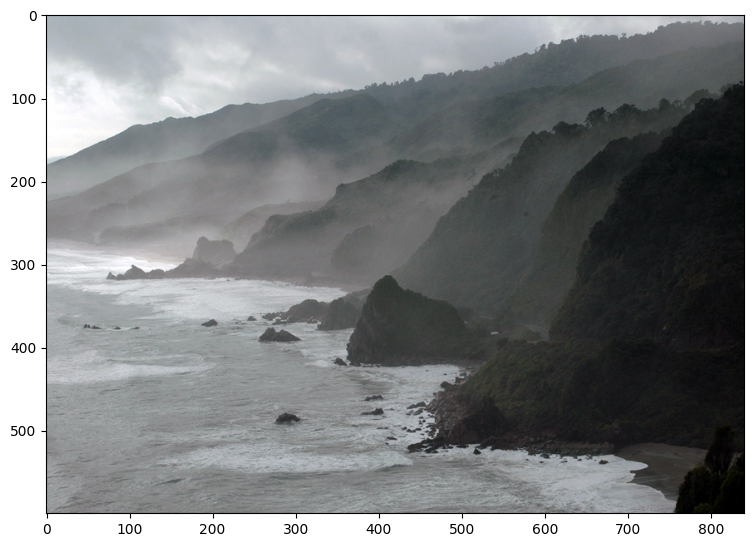

In [4]:
img_bgr = cv.imread('../Photos/New_Zealand_Coast.jpg')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

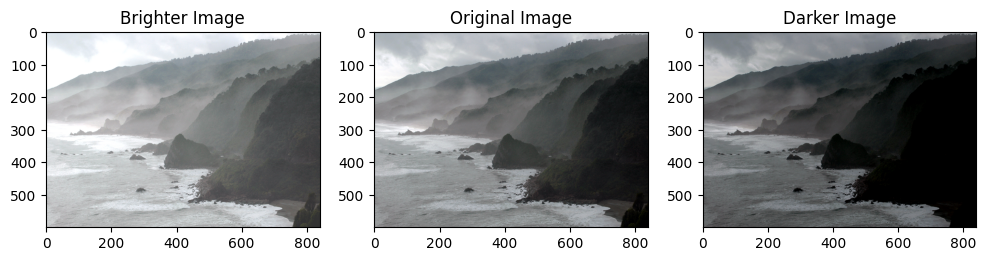

In [7]:
matrix = np.ones(img_bgr.shape, dtype=np.uint8) * 50
img_rgb_brighter = cv.add(img_rgb, matrix)
img_rgb_darker = cv.subtract(img_rgb, matrix)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb_brighter)
plt.title('Brighter Image')
plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(1, 3, 3)
plt.imshow(img_rgb_darker)
plt.title('Darker Image')
plt.show()

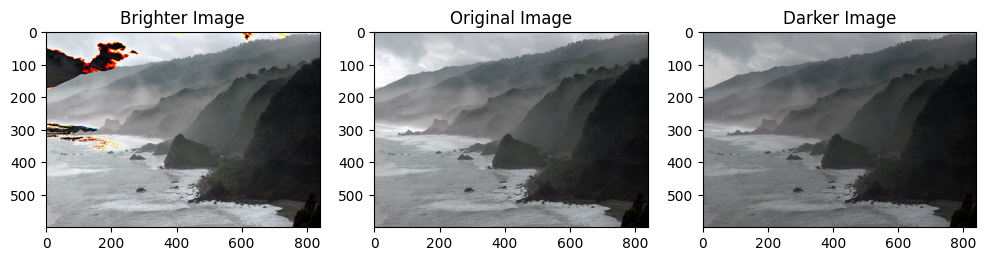

In [ ]:
matrix1 = np.ones(img_rgb.shape, dtype=np.float32) * 0.8
matrix2 = np.ones(img_rgb.shape, dtype=np.float32) * 1.2
img_rgb_darker = np.uint8(cv.multiply(np.float32(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv.multiply(np.float32(img_rgb), matrix2))
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb_brighter)
plt.title('Brighter Image')
plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title('Original Image') 
plt.subplot(1, 3, 3)
plt.imshow(img_rgb_darker)
plt.title('Darker Image')
plt.show()

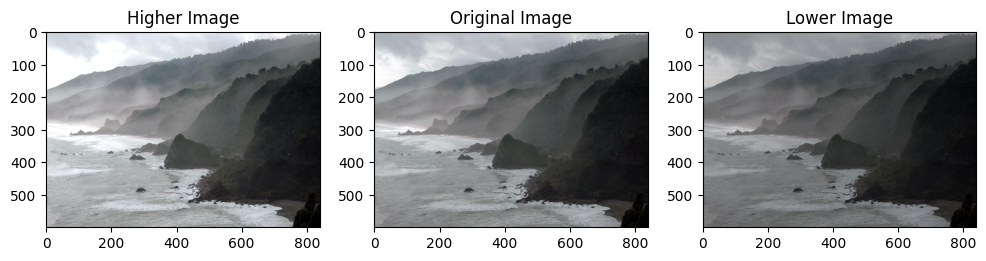

In [10]:
matrix1 = np.ones(img_rgb.shape, dtype=np.float32) * 0.8
matrix2 = np.ones(img_rgb.shape, dtype=np.float32) * 1.2
img_rgb_lower = np.uint8(cv.multiply(np.float32(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv.multiply(np.float32(img_rgb), matrix2), 0, 255))
# np.clip is used to ensure that pixel values do not exceed 255 or go below 0.
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb_higher)
plt.title('Higher Image')
plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.subplot(1, 3, 3)
plt.imshow(img_rgb_lower)
plt.title('Lower Image')
plt.show()

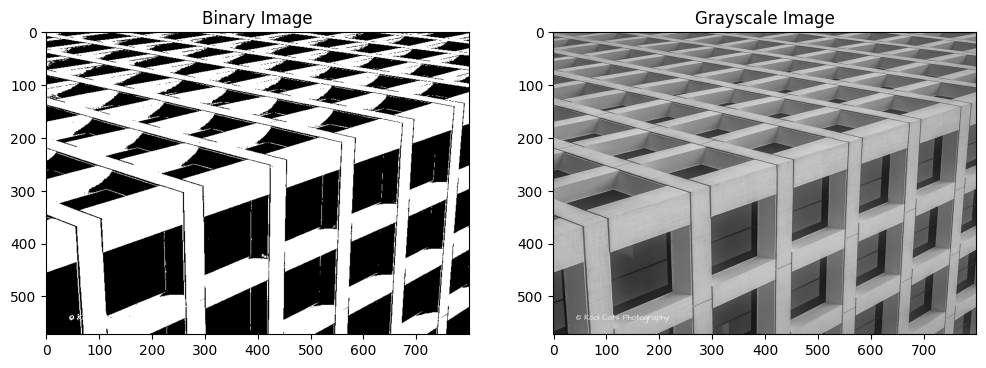

In [15]:
# Thresholding
img_gray = cv.imread('../Photos/building-windows.jpg', cv.IMREAD_GRAYSCALE)
_, img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)
# Parameters: (source image, threshold value, max value, thresholding type)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

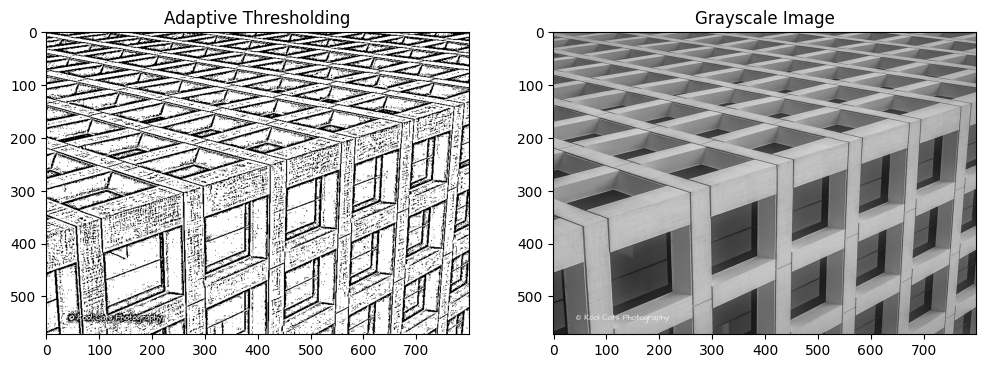

In [16]:
# Adaptive Thresholding
img_adaptive = cv.adaptiveThreshold(img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
# Parameters: (source image, max value, adaptive method, thresholding type, block size, constant)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

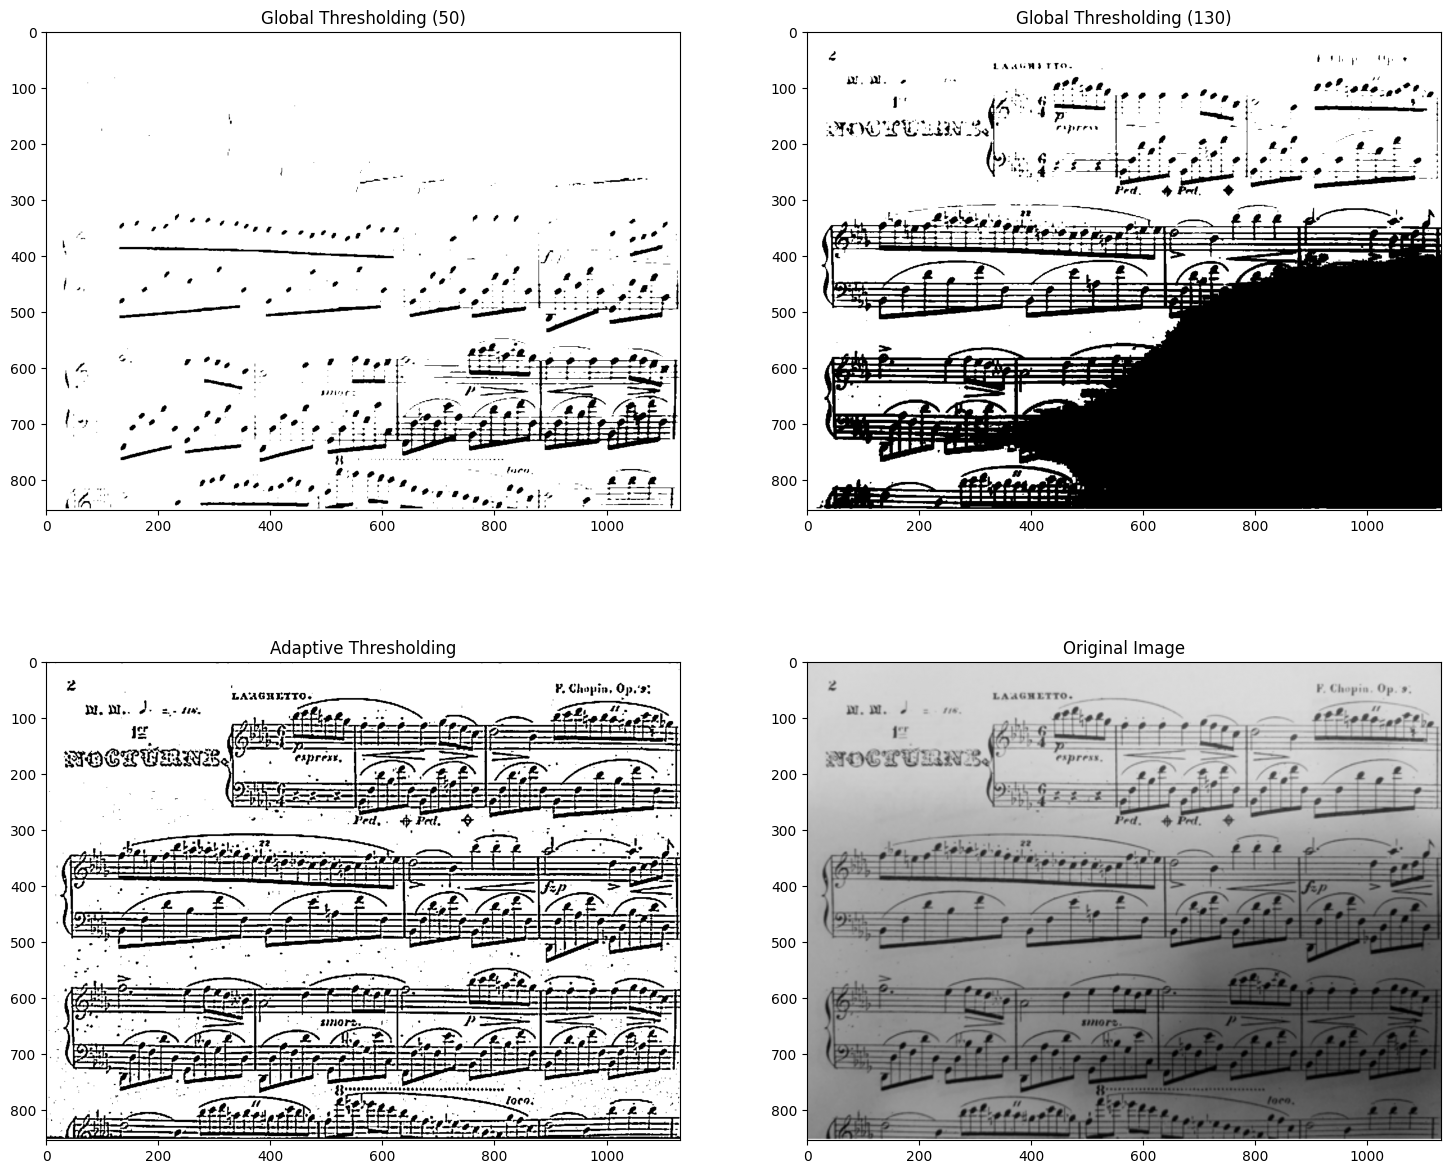

In [20]:
img_read = cv.imread('../Photos/Piano_Sheet_Music.png', cv.IMREAD_GRAYSCALE)

# global thresholding 50
_, img_binary = cv.threshold(img_read, 50, 255, cv.THRESH_BINARY)

# global thresholding 130
_, img_binary2 = cv.threshold(img_read, 130, 255, cv.THRESH_BINARY)

# adaptive thresholding
img_adaptive = cv.adaptiveThreshold(img_read, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.figure(figsize=[18,15])
plt.subplot(2, 2, 1)
plt.imshow(img_binary, cmap='gray')
plt.title('Global Thresholding (50)')
plt.subplot(2, 2, 2)
plt.imshow(img_binary2, cmap='gray')
plt.title('Global Thresholding (130)')
plt.subplot(2, 2, 3)
plt.imshow(img_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')
plt.subplot(2, 2, 4)
plt.imshow(img_read, cmap='gray')
plt.title('Original Image')
plt.show()

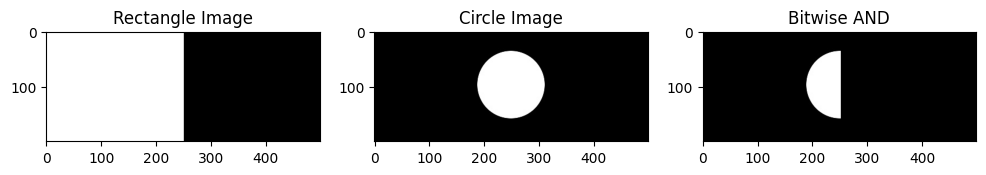

In [21]:
# Bitwise Operations
img1 = cv.imread('../Photos/rectangle.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../Photos/circle.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Rectangle Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Circle Image')
img_and = cv.bitwise_and(img1, img2)
plt.subplot(1, 3, 3)
plt.imshow(img_and, cmap='gray')
plt.title('Bitwise AND')
plt.show()


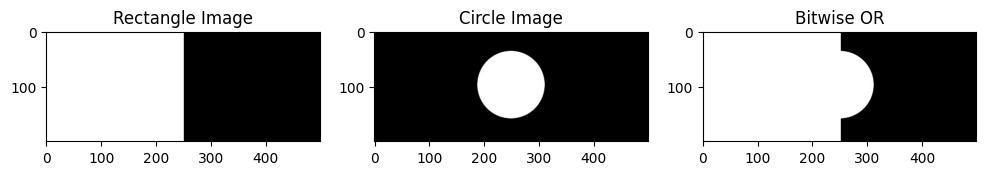

In [22]:
# Or
img_or = cv.bitwise_or(img1, img2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Rectangle Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Circle Image')
plt.subplot(1, 3, 3)
plt.imshow(img_or, cmap='gray')
plt.title('Bitwise OR')
plt.show()

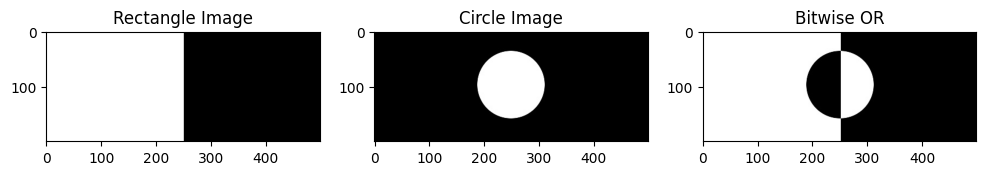

In [23]:
# Xor
img_xor = cv.bitwise_xor(img1, img2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Rectangle Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Circle Image')
plt.subplot(1, 3, 3)
plt.imshow(img_xor, cmap='gray')
plt.title('Bitwise OR')
plt.show()

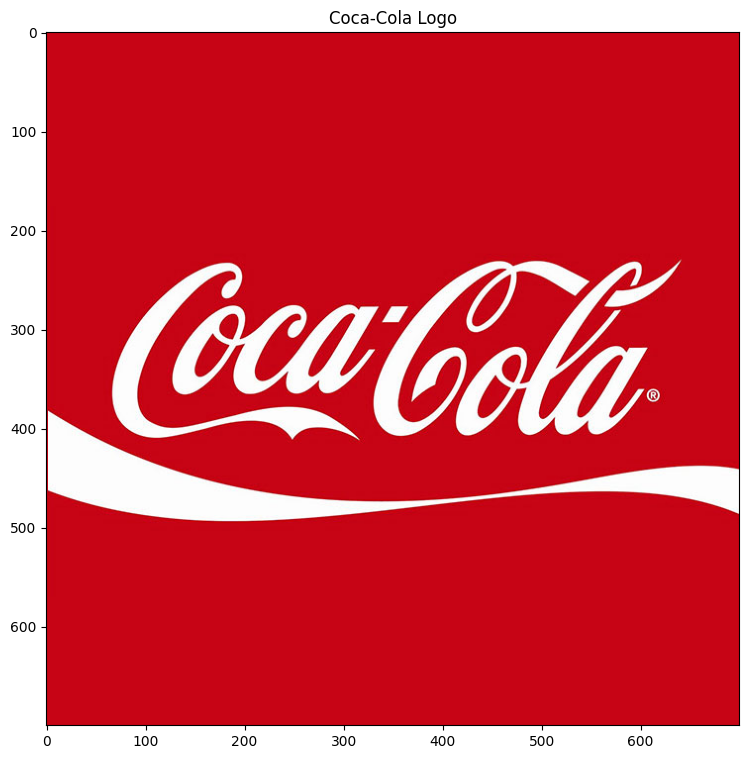

In [24]:
img_coca = cv.imread('../Photos/coca-cola-logo.png')
img_rgb = cv.cvtColor(img_coca, cv.COLOR_BGR2RGB)
logo_width = img_rgb.shape[1]
logo_height = img_rgb.shape[0]
plt.imshow(img_rgb)
plt.title('Coca-Cola Logo')
plt.show()

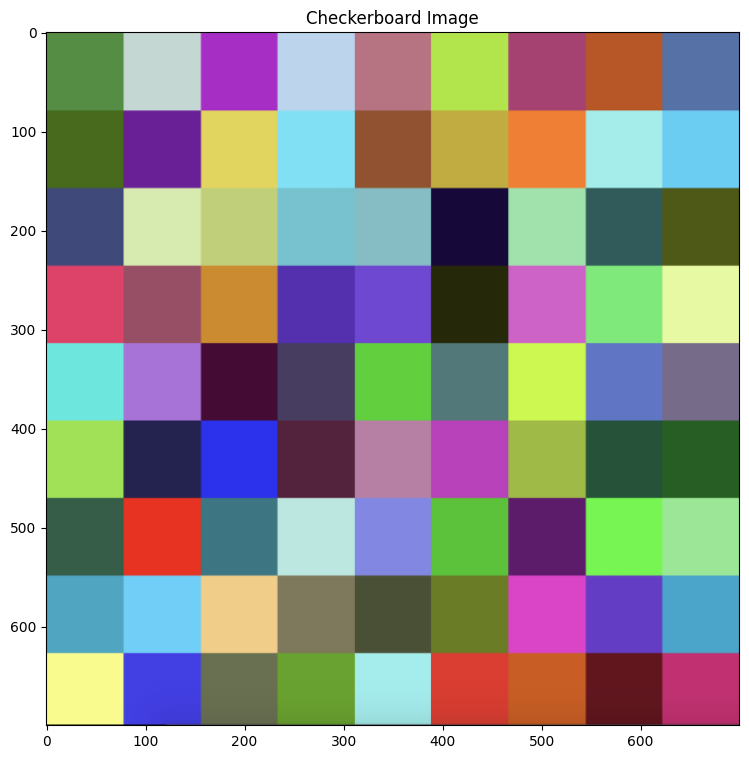

In [25]:
img_check = cv.imread('../Photos/checkerboard_color.png')
img_check_rgb = cv.cvtColor(img_check, cv.COLOR_BGR2RGB)

aspect_ratio = logo_width / img_check_rgb.shape[1]
# This will ensure that the logo fits within the checkerboard image.
dim = (logo_width, int(img_check_rgb.shape[0] * aspect_ratio))

img_check_rgb = cv.resize(img_check_rgb, dim, interpolation=cv.INTER_AREA)
plt.imshow(img_check_rgb)
plt.title('Checkerboard Image')
plt.show()

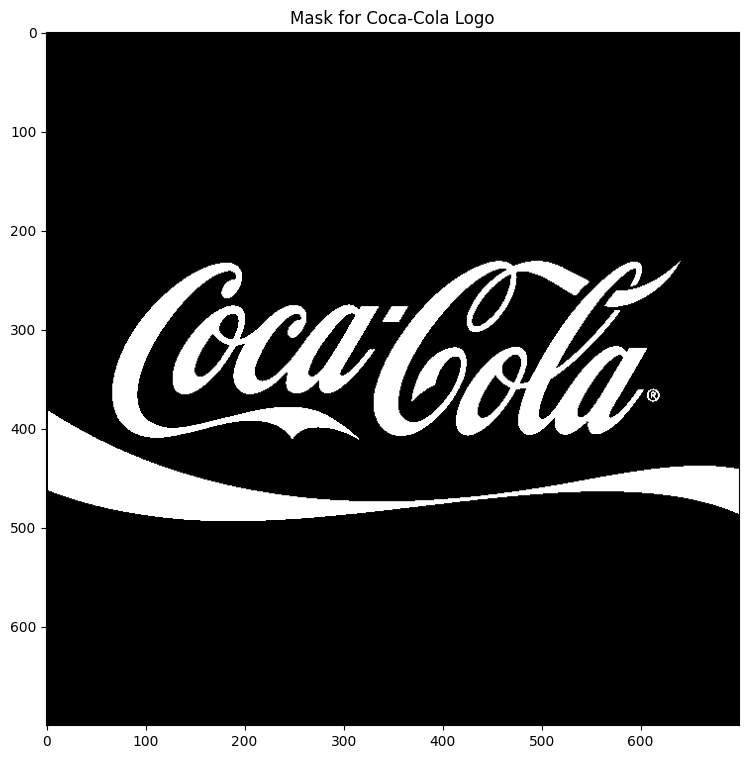

In [26]:
img_gray = cv.cvtColor(img_coca, cv.COLOR_RGB2GRAY)

_, mask = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.title('Mask for Coca-Cola Logo')
plt.show()

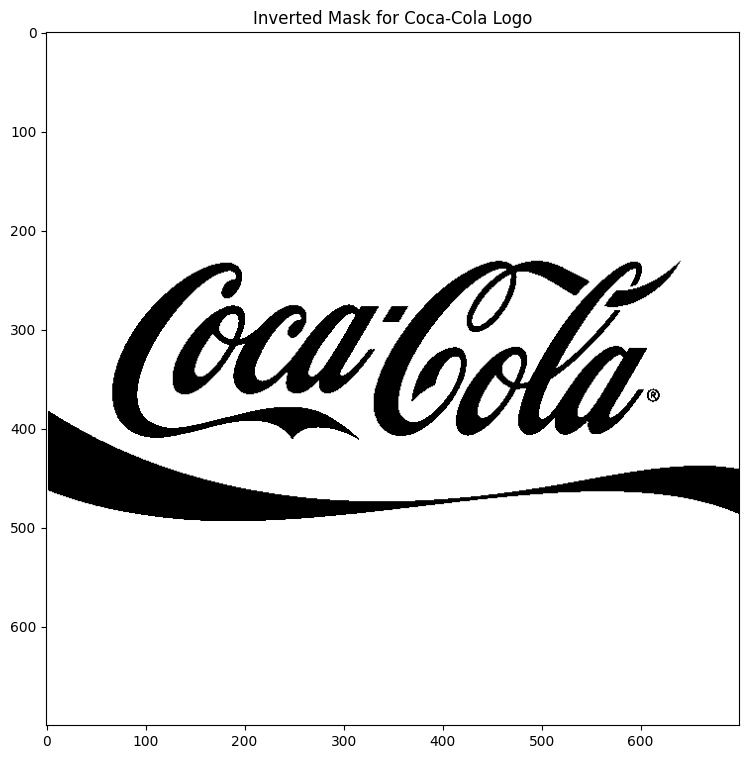

In [27]:
img_mask_inverted = cv.bitwise_not(mask)
plt.imshow(img_mask_inverted, cmap='gray')
plt.title('Inverted Mask for Coca-Cola Logo')
plt.show()

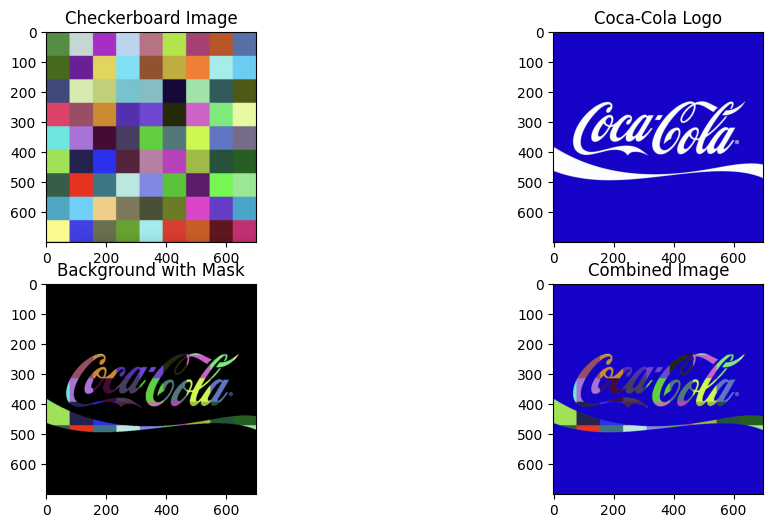

In [ ]:
img_background = cv.bitwise_and(img_check_rgb, img_check_rgb, mask=mask)
img_foreground = cv.bitwise_and(img_coca, img_coca, mask=img_mask_inverted)
img_combined = cv.add(img_background, img_foreground) 
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_check_rgb)
plt.title('Checkerboard Image')
plt.subplot(2, 2, 2)
plt.imshow(img_coca)
plt.title('Coca-Cola Logo')
plt.subplot(2, 2, 3)
plt.imshow(img_background)
plt.title('Background with Mask')
plt.subplot(2, 2, 4)
plt.imshow(img_combined)
plt.title('Combined Image')
plt.show()